In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('ipl.csv')

In [8]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [9]:
df.shape

(76014, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


<Axes: >

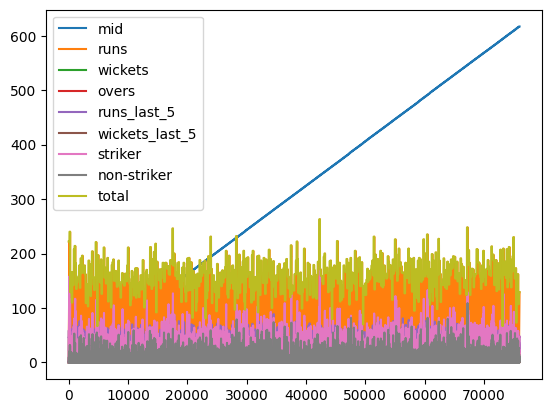

In [11]:
df.plot()

In [12]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [13]:
df['runs'].value_counts

<bound method IndexOpsMixin.value_counts of 0          1
1          1
2          2
3          2
4          2
        ... 
76009    121
76010    127
76011    128
76012    129
76013    129
Name: runs, Length: 76014, dtype: int64>

###Data cleaning

* Remove Unwanted columns
* Keeping only consistent teams
* Converting the column 'date' from string into datetime object

In [14]:
##removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [15]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [16]:
df.index

RangeIndex(start=0, stop=76014, step=1)

In [17]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

In [18]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [19]:
# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [20]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [21]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


In [22]:
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [23]:

# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [24]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [25]:
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_train
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


##Model Building

In [26]:
X_train

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
33,61,1,5.2,59,1,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
34,61,1,5.3,59,1,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
35,61,1,5.4,59,1,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
36,61,1,5.5,58,1,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,194,7,19.2,54,4,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
68858,200,7,19.3,56,4,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
68859,201,7,19.4,56,4,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
68860,202,7,19.5,57,4,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [27]:
X_test

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
68894,46,1,5.1,42,1,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
68895,50,1,5.2,46,1,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
68896,50,1,5.3,44,1,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
68897,54,1,5.4,48,1,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
68898,58,1,5.5,51,1,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,106,9,18.1,29,4,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
75885,107,9,18.2,29,4,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
75886,107,9,18.3,28,4,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
75887,107,9,18.4,24,4,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


###Linear Regression

In [28]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred_linear = lr.predict(X_test)

####Linear regression model evaluation

In [30]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_linear)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_linear)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_linear))))


---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.11861754619324
Mean Squared Error (MSE): 251.00792310417262
Root Mean Squared Error (RMSE): 15.84322956673205


##Decission Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [32]:
y_pred_dt = dt.predict(X_test)

####Model evaluation

In [33]:
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 16.879769618430526
Mean Squared Error (MSE): 514.2584593232541
Root Mean Squared Error (RMSE): 22.67726745715308


##Random Forests Model

In [34]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [35]:
y_pred_rfr = rfr.predict(X_test)

In [36]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rfr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rfr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rfr))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.791616690664748
Mean Squared Error (MSE): 334.36979265119794
Root Mean Squared Error (RMSE): 18.28578116054105



As , we see Linear regression performing Best among the three regressor models so we select Linear regresssion model for boosting its performance  using adaboost algorithm

###AdaBoost

In [37]:
from sklearn.ensemble import AdaBoostRegressor
adb_regressor = AdaBoostRegressor(base_estimator=lr, n_estimators=100)
adb_regressor.fit(X_train, y_train)

c:\Users\Ganesh Sonti\OneDrive\Desktop\ml project\venv\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100)

In [38]:
# Predicting results
y_pred_adb = adb_regressor.predict(X_test)

####Model Evaluation

In [39]:
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.111562264167842
Mean Squared Error (MSE): 246.39134349492554
Root Mean Squared Error (RMSE): 15.696857758638368


###Manual Predictions
* Model trained on the data from IPL Seasons 1 to 9 ie: (2008 to 2016)
*  Model tested on data from IPL Season 10 ie: (2017)
* Model predicts on furthr seasons data

In [40]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(lr.predict(temp_array)[0])

**Creating Report For EDA**

In [41]:
%pip install sweetviz

  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached MarkupSafe-2.1.2-cp311-cp311-win_amd64.whl (16 kB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.10.1
    Uninstalling Jinja2-2.10.1:
      Successfully uninstalled Jinja2-2.10.1
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
train = pd.DataFrame(X_train)

In [43]:
train

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
33,61,1,5.2,59,1,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
34,61,1,5.3,59,1,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
35,61,1,5.4,59,1,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
36,61,1,5.5,58,1,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,194,7,19.2,54,4,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
68858,200,7,19.3,56,4,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
68859,201,7,19.4,56,4,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
68860,202,7,19.5,57,4,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [44]:
test = pd.DataFrame(X_test)

In [45]:
test[:5]

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
68894,46,1,5.1,42,1,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
68895,50,1,5.2,46,1,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
68896,50,1,5.3,44,1,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
68897,54,1,5.4,48,1,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
68898,58,1,5.5,51,1,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [46]:
#import sweetviz
#my_report = sweetviz.analyze(([encoded_df,"encoded_df"]), target_feat= "total")

In [47]:
#my_report.show_html('report.html')

In [48]:
# Creating a pickle file for the classifier
import pickle
filename = 'lr-model.pkl'
pickle.dump(lr, open(filename, 'wb'))